<a href="https://colab.research.google.com/github/DrNOFX97/lab-tensorflow-exercises/blob/main/lab_tensorflow_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow exercices

Exercise 1: Create a TensorFlow constant tensor with values [1, 2, 3, 4, 5].

In [1]:
import tensorflow as tf
tensor = tf.constant([1, 2, 3, 4, 5])
print(tensor)

tf.Tensor([1 2 3 4 5], shape=(5,), dtype=int32)


Exercise 2: Create a TensorFlow variable tensor initialized with zeros of shape (3, 3).

In [2]:
variable_tensor = tf.Variable(tf.zeros((3, 3)))
print(variable_tensor)

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)>


Exercise 3: Perform matrix multiplication of two TensorFlow constant tensors A and B.

In [3]:
A = tf.constant([[1, 2], [3, 4]])
B = tf.constant([[5, 6], [7, 8]])
result = tf.matmul(A, B)
print(result)

tf.Tensor(
[[19 22]
 [43 50]], shape=(2, 2), dtype=int32)


Exercise 4: Create a TensorFlow placeholder for a scalar value.

In [4]:
scalar = tf.constant(5.0)
print(scalar)

tf.Tensor(5.0, shape=(), dtype=float32)


Exercise 5: Define a TensorFlow operation to compute the element-wise product of two tensors.

In [5]:
tensor1 = tf.constant([1, 2, 3])
tensor2 = tf.constant([4, 5, 6])
elementwise_product = tf.multiply(tensor1, tensor2)
print(elementwise_product)

tf.Tensor([ 4 10 18], shape=(3,), dtype=int32)


Exercise 6: Create a TensorFlow graph to compute the mean of a given tensor along a specified axis.

In [6]:
tensor = tf.constant([[1, 2, 3], [4, 5, 6]])
mean = tf.reduce_mean(tensor, axis=1)
print(mean)

tf.Tensor([2 5], shape=(2,), dtype=int32)


Exercise 7: Implement a simple linear regression model using TensorFlow.

In [7]:
import numpy as np

# Generate some random data
np.random.seed(0)
X = np.random.rand(100, 1)
y = 2 * X + 1 + np.random.randn(100, 1) * 0.1

# Define model parameters
W = tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

# Define the model
def linear_regression(x):
    return W * x + b

# Define loss function (Mean Squared Error)
def loss(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Define optimizer
optimizer = tf.optimizers.SGD(learning_rate=0.01)

# Training
for epoch in range(100):
    # Forward pass
    with tf.GradientTape() as tape:
        y_pred = linear_regression(X)
        current_loss = loss(y_pred, y)
    # Backward pass
    gradients = tape.gradient(current_loss, [W, b])
    # Update weights
    optimizer.apply_gradients(zip(gradients, [W, b]))

print(W.numpy(), b.numpy())

[1.1180489] [1.2402753]


Exercise 8: Create a TensorFlow dataset from a NumPy array.

In [8]:
dataset = tf.data.Dataset.from_tensor_slices(np.array([1, 2, 3, 4, 5]))
print(dataset)

<_TensorSliceDataset element_spec=TensorSpec(shape=(), dtype=tf.int64, name=None)>


Exercise 9: Define a custom TensorFlow function using tf.function decorator.

In [9]:
@tf.function
def custom_function(x):
    return x * 2

result = custom_function(5)
print(result)

tf.Tensor(10, shape=(), dtype=int32)


Exercise 10: Load and preprocess an image using TensorFlow.

In [15]:
import os
import requests
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.imagenet_utils import preprocess_input

# Define the URL of the image you want to download
image_url = "https://drive.google.com/uc?id=1VZGor0hAsYpowU_kI8WIBspYGtoD8vww"

# Define the file name for the downloaded image
image_filename = "dogs.jpeg"

# Define the path to save the downloaded image
image_path = os.path.join("/content", image_filename)

# Download the image from the URL
response = requests.get(image_url)
if response.status_code == 200:
    with open(image_path, 'wb') as f:
        f.write(response.content)
    print(f"Image successfully downloaded and saved to {image_path}")
else:
    print(f"Failed to download the image. Status code: {response.status_code}")

# Define the path to the downloaded image
image_path = os.path.join(os.getcwd(), image_filename)

# Load and preprocess the image using TensorFlow with ImageNet preprocessing
def load_and_preprocess_image(image_path):
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)
    image_array = preprocess_input(image_array)
    return image_array

try:
    preprocessed_image = load_and_preprocess_image(image_path)
    print("Shape of preprocessed image:", preprocessed_image.shape)
except FileNotFoundError:
    print("File not found. Please ensure the image path is correct.")

Image successfully downloaded and saved to /content/dogs.jpeg
Shape of preprocessed image: (1, 224, 224, 3)


Exercise 11: Neural Network
Build and train a neural network with one hidden layer on the MNIST dataset.

Epoch 1/5
750/750 [==============================] - 11s 11ms/step - loss: 0.3346 - accuracy: 0.9057 - val_loss: 0.1884 - val_accuracy: 0.9472
Epoch 2/5
750/750 [==============================] - 10s 13ms/step - loss: 0.1540 - accuracy: 0.9559 - val_loss: 0.1320 - val_accuracy: 0.9617
Epoch 3/5
750/750 [==============================] - 4s 6ms/step - loss: 0.1070 - accuracy: 0.9691 - val_loss: 0.1151 - val_accuracy: 0.9687
Epoch 4/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0802 - accuracy: 0.9774 - val_loss: 0.1064 - val_accuracy: 0.9673
Epoch 5/5
750/750 [==============================] - 4s 6ms/step - loss: 0.0640 - accuracy: 0.9819 - val_loss: 0.0988 - val_accuracy: 0.9710


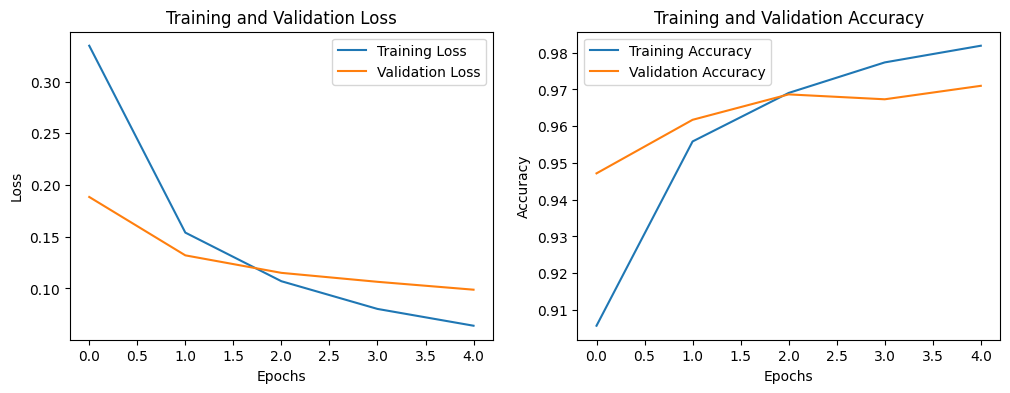

In [12]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import matplotlib.pyplot as plt

# Load MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess data
train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.2)

# Extract loss and accuracy for both training and validation sets
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Display the plots
plt.show()
